# 3. Random forest and one-class SVM for email spam classifier

Your task for this question is to build a spam classifier using the UCR email spam dataset https:
//archive.ics.uci.edu/ml/datasets/Spambase came from the postmaster and individuals who had
filed spam. Please download the data from that website. The collection of non-spam emails came from
filed work and personal emails, and hence the word ’george’ and the area code ’650’ are indicators of
non-spam. These are useful when constructing a personalized spam filter. 


In [103]:
spam = pd.read_csv('data/spambase.data', header = None)
colnames = ["freq_make", "freq_address", "freq_all", "freq_3d", "freq_our", "freq_over", "freq_remove",
            "freq_internet", "freq_order", "freq_mail", "freq_receive", "freq_will", "freq_people", 
            "freq_report", "freq_addresses", "freq_free", "freq_business", "freq_email", "freq_you", 
            "freq_credit", "freq_your", "freq_font", "freq_000", "freq_money", "freq_hp", "freq_hpl", 
            "freq_george", "freq_650", "freq_lab", "freq_labs", "freq_telnet", "freq_857", "freq_data", 
            "freq_415", "freq_85", "freq_technology", "freq_1999", "freq_parts", "freq_pm", "freq_direct", 
            "freq_cs", "freq_meeting", "freq_original", "freq_project", "freq_re", "freq_edu", "freq_table", 
            "freq_conference", "freq_;", "freq_(", "freq_[", "freq_!", "freq_$", "freq_#", 
            "capital_run_length_average", "capital_run_length_longest", "capital_run_length_total", "label"]
spam.columns = colnames
spam = spam.fillna(0)
spam.head()

,freq_make,freq_address,freq_all,freq_3d,freq_our,freq_over,freq_remove,freq_internet,freq_order,freq_mail,...,freq_;,freq_(,freq_[,freq_!,freq_$,freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


**(a) Build a CART model and visualize the fitted classification tree.**

In [104]:
y = spam['label'].array
X = np.array(spam.drop(columns = ['label']))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [134]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
pred = tree.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred)}")

Accuracy: 0.9207383279044516


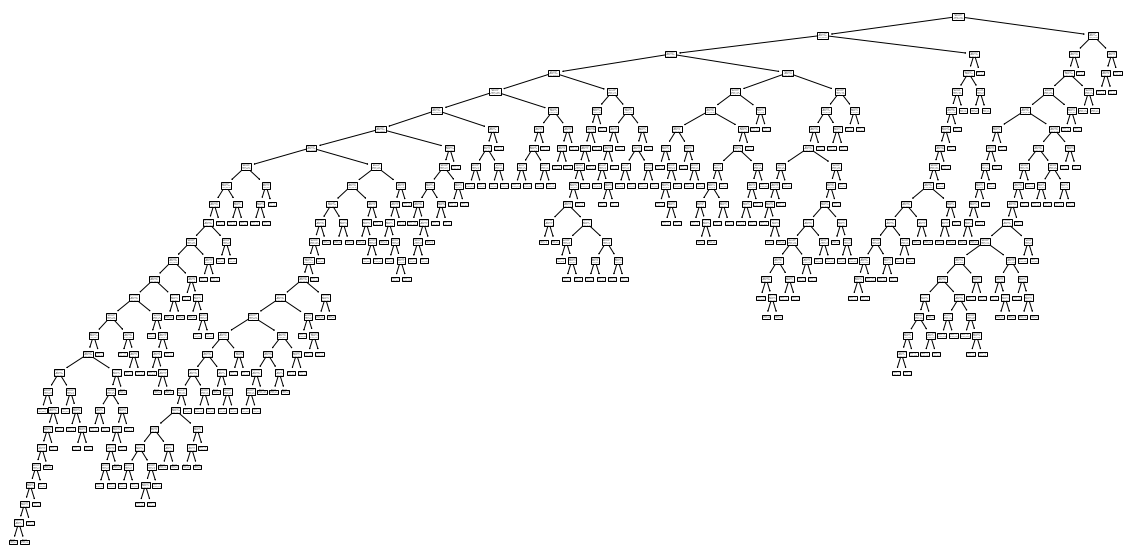

In [135]:
plt.figure(figsize=(20,10))
plot_tree(tree)
plt.show()

**(b)  Now also build a random forest model. Partition the data to use the first 80%
for training and the remaining 20% for testing. Compare and report the test error for your
classification tree and random forest models on testing data. Plot the curve of test error (total
misclassification error rate) versus the number of trees for the random forest, and plot the test
error for the CART model (which should be a constant with respect to the number of trees).**

In [140]:
start = time.time()
rf = RandomForestClassifier(random_state=1)
modelgrid = GridSearchCV(estimator=rf, param_grid={
                                                'n_estimators':np.arange(50,500,1)}, 
                                                 cv=5)

# print(f"Intercept: {model_grid}")
modelgrid.fit(X,y)

print(f"Took {time.time() - start} seconds to run.")

Best Parameter: {'n_estimators': 101}
Best MSE: 0.9308799509040269
Best Residual Sum of squares: 727.017241656045
Took 4607.528707742691 seconds to run.


In [144]:

print(f"Best Parameter: {modelgrid.best_params_}")
print(f"Best Accuracy: {modelgrid.best_score_}")
# print(f"Best Residual Sum of squares: {modelgrid.best_score_ * len(data)}"

Best Parameter: {'n_estimators': 101}
Best Accuracy: 0.9308799509040269
Took 8840.873127698898 seconds to run.


Text(0.5, 1.0, 'CV Curve')

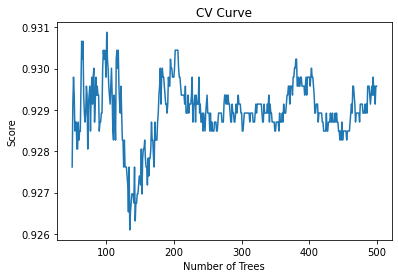

In [142]:
plt.plot(modelgrid.cv_results_['param_n_estimators'], modelgrid.cv_results_['mean_test_score'])
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.title("CV Curve")

**(c)  Now we will use a one-class SVM approach for spam filtering. Partition the data to
use the first 80% for training and the remaining 20% for testing. Extract all non-spam emails
from the training block (80% of data you have selected) to build the one-class kernel SVM using
RBF kernel (you can turn the kernel bandwidth to achieve good performance). Then apply it on
the 20% of data reserved for testing (thus this is a novelty detection situation), and report the
total misclassification error rate on these testing data.**

In [106]:
XX = [x for i, x in enumerate(X_train) if y_train[i] == 0]

ocsvm = OneClassSVM(kernel = 'rbf', gamma = 'scale')
ocsvm.fit(X_train)
ypred = ocsvm.predict(X_train)
trainerror = ypred[ypred == -1].size / ypred.size
print(trainerror)
# ypredtest = ocsvm

ypredtest = ocsvm.predict(X_test)
testerror = ypredtest[ypredtest == -1].size / ypredtest.size
print(f"Misclassification rate: {testerror}")

0.49972826086956523
Misclassification rate: 0.48968512486427795


The Lasso reconstruction is the best reconstruciton, as we can see that it eliminates the most noise.